![img](drinks.jpg)

# Analisis de bebidas por Clustering

Este pequeña practica buscara establecer unos cluster según la cercanica de los paises en cuanto al consumo de bebidas alcoholicas, entre ellas cerveza, vino y bebidas blancas.

El datasaet esta basado en el siguiente: https://www.kaggle.com/faressayah/drinks-by-country



### Establecemos los datos para el analisis

In [3]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd

In [123]:
# Improtamos el Dataset

data = pd.read_csv("drinks.csv")
data = data.drop(["total_litres_of_pure_alcohol"], axis=1)
data.head()

,country,continent,beer_servings,spirit_servings,wine_servings
0,Algeria,Africa,25,0,14
1,Angola,Africa,217,57,45
2,Benin,Africa,34,4,13
3,Botswana,Africa,173,35,35
4,Burkina Faso,Africa,25,7,7


In [78]:
# Extraemos el nombre de las columnas

drinks_data = data.columns.values.tolist()[2:]

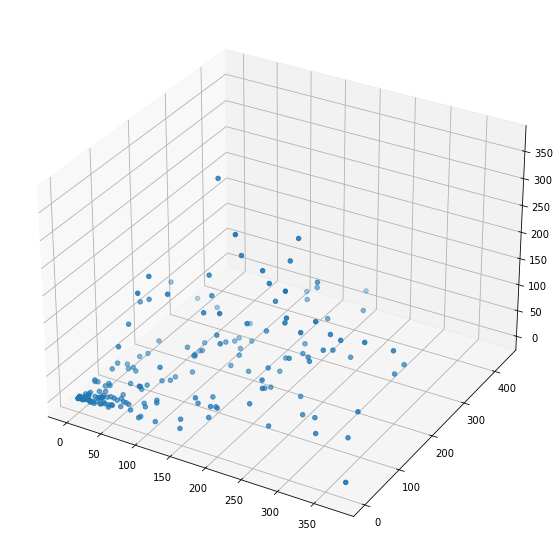

In [81]:
# Realizamos un grafico espacial para ver como se aglomeran los puntos

fig = plt.figure(figsize = (25, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(xs = data["beer_servings"], ys = data["spirit_servings"], zs = data["wine_servings"])

Notamos una aglomeración cerca del punto [0, 0, 0] y pocos paises sobre el EJE Z

### Realizamos el Dendograma y vemos los Clusters

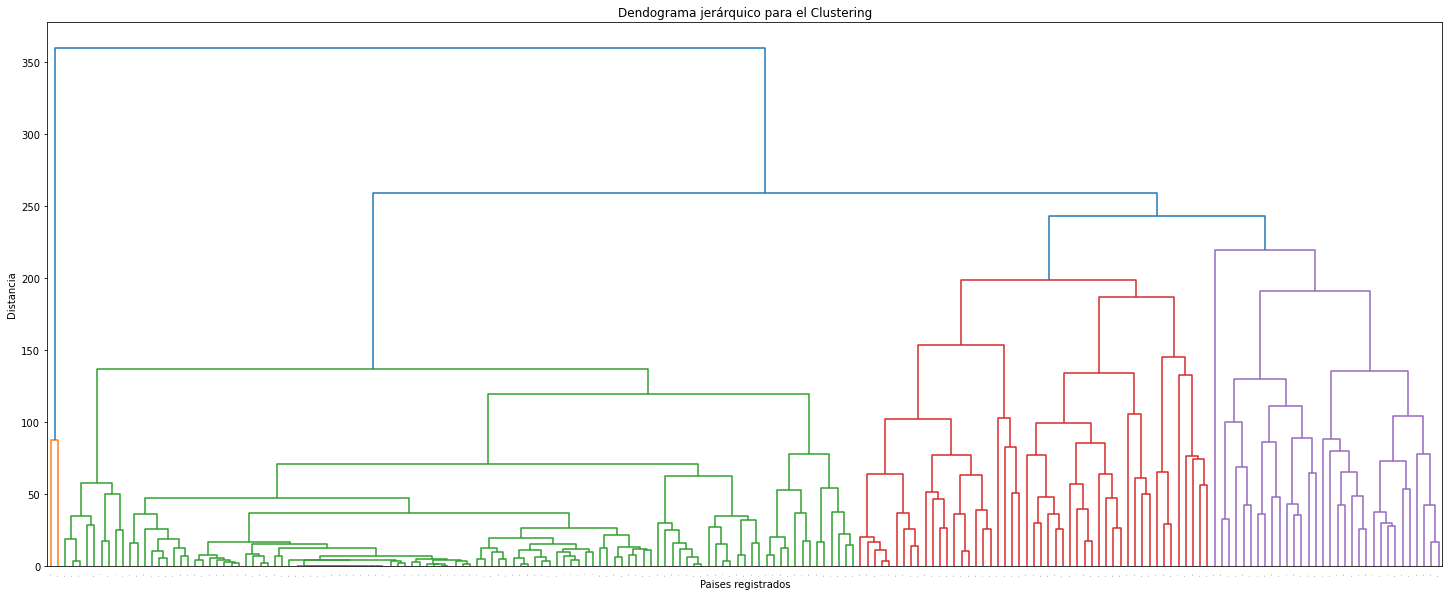

In [82]:
Z = linkage(data[drinks_data], "average")
plt.figure(figsize = (25, 10))
plt.title("Dendograma jerárquico para el Clustering")
plt.xlabel("Paises registrados")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=0, color_threshold=0.65*359)
plt.show()

## Truncamos el dendrograma

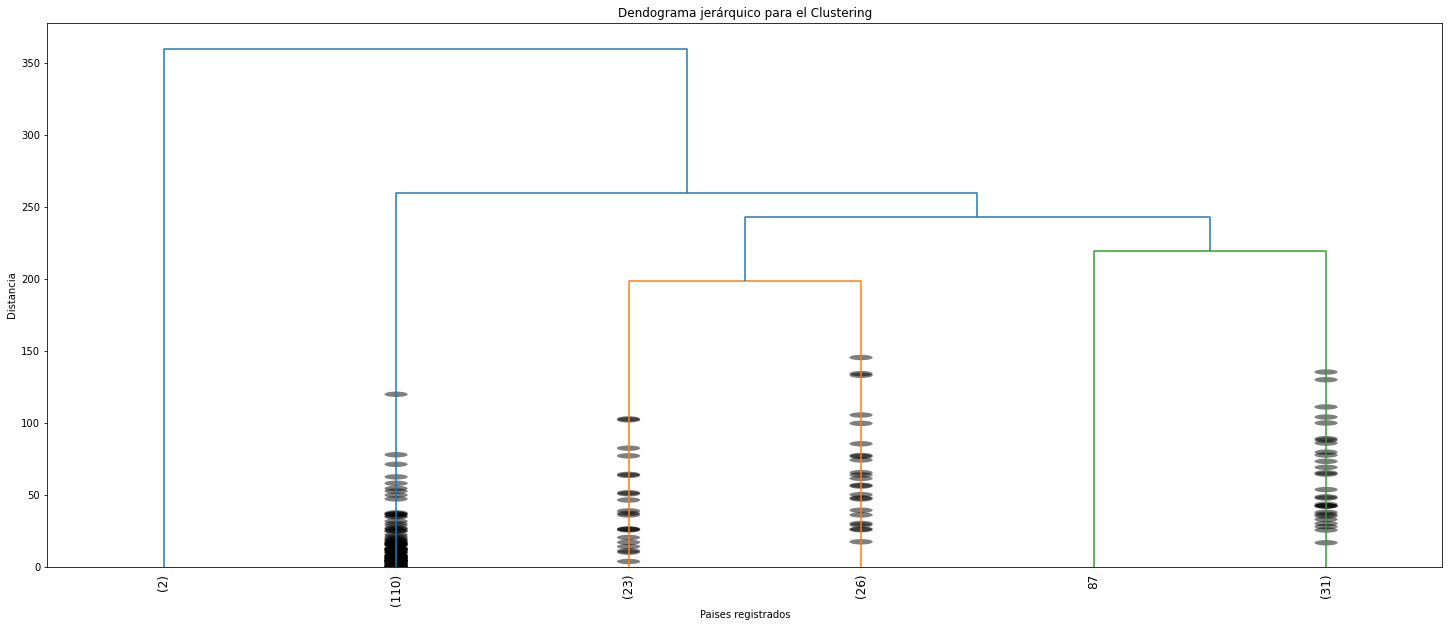

In [80]:
Z = linkage(data[drinks_data], "average")
plt.figure(figsize = (25, 10))
plt.title("Dendograma jerárquico para el Clustering")
plt.xlabel("Paises registrados")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=12, color_threshold=0.65*359, 
           truncate_mode="lastp", p=6, show_leaf_counts=True, show_contracted=True)
plt.show()

Se puede apreciar unos 4 cluster bien definidos, por lo cual buscaremos establecerlos y luego estudiar de que continente pertenecen los paises que los componen

## Recuperar los clusters y sus elementos

In [66]:
from scipy.cluster.hierarchy import fcluster

In [118]:
k = 4
clusters = fcluster(Z, k, criterion="maxclust")

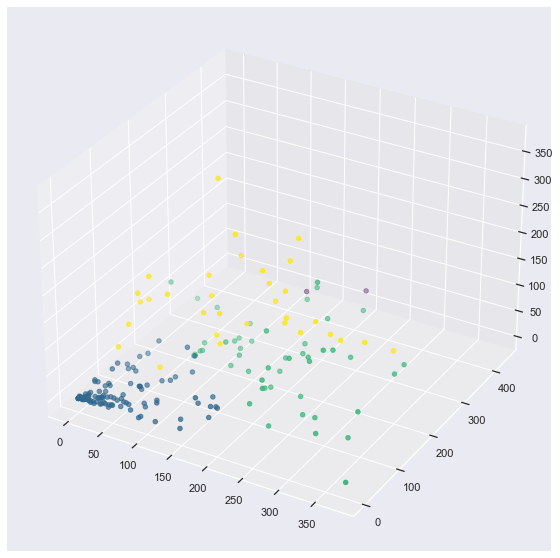

In [119]:
# Realizamos una figura para ver como se aglmoran

fig = plt.figure(figsize = (25, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(xs = data["beer_servings"], ys = data["spirit_servings"], zs = data["wine_servings"], c= clusters, cmap="viridis")

In [125]:
data["cluster"] = clusters

In [127]:
import collections

n = 1
for cluster in range(k):
    cantidad = collections.Counter(clusters)[n]
    mean_beer = round(data[data["cluster"] == n]["beer_servings"].mean(), 2)
    mean_wine = round(data[data["cluster"] == n]["wine_servings"].mean(), 2)
    mean_spirit_drink = round(data[data["cluster"] == n]["spirit_servings"].mean(), 2)
    print(f"Elementos dentro del cluster {n} son: {cantidad} con una media de cerveza {mean_beer}, vino {mean_wine} y bebida blanca {mean_spirit_drink}")
    n += 1

Elementos dentro del cluster 1 son: 2 con una media de cerveza 170.5, vino 35.0 y bebida blanca 405.5
Elementos dentro del cluster 2 son: 110 con una media de cerveza 41.03, vino 6.36 y bebida blanca 29.91
Elementos dentro del cluster 3 son: 49 con una media de cerveza 195.39, vino 45.22 y bebida blanca 180.08
Elementos dentro del cluster 4 son: 32 con una media de cerveza 189.41, vino 204.94 y bebida blanca 84.59


Es intereresante ver que en un Cluster solo calificaron 2 paises, como curiosidad se hace un print de estos

In [130]:
data[data["cluster"] == 1]

,country,continent,beer_servings,spirit_servings,wine_servings,cluster
77,Belarus,Europe,142,373,42,1
116,Grenada,North America,199,438,28,1


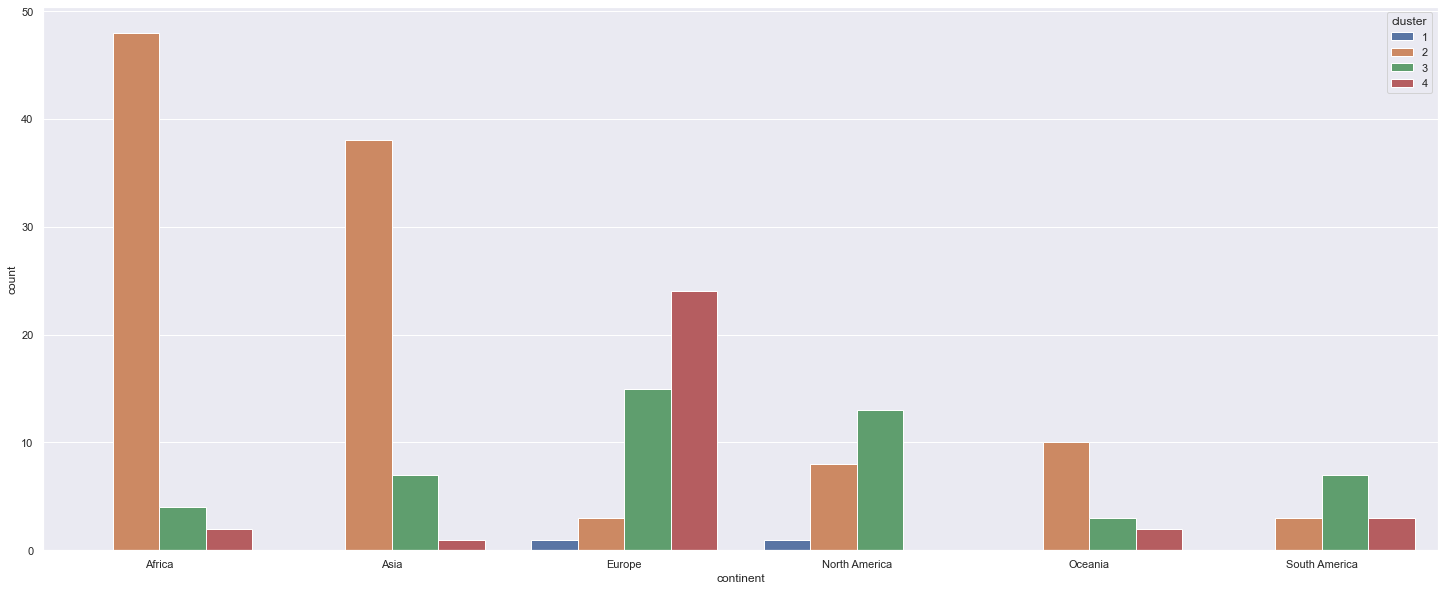

In [128]:
import seaborn as sns
fig = plt.figure(figsize = (25, 10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x = "continent", hue="cluster", data=data)

El grafico final muestra que:

* Los continentes de Africa/Asia y Oceania tienden a agruparse en un grupo donde en general el volumen de consumo de alcohol es bajo, principalmente en vino
* Europa tiene un consumo mucho mas elevado, proporcional en cerveza pero varia de forma bastante pareja su consumo en bebidas blancas o vino
* Amrica del Sur no tiene un patron claro para aglomerarse
* America del Norte en general tiene poca consumo de vino como bebida predominante
* America del Norte y Europa comparten un pais donde hay mucho consumo de bebidas blancas (Belarus y Grenada) 